# K Means Clustering

### Algorithm
<img src=kmc1.png height=400 width=400>
<img src=kmc2.png height=400 width=400>
<img src=kmc3.png height=400 width=400>
<img src=kmc4.png height=400 width=400>
<img src=kmc5.png height=400 width=400>
<img src=kmc6.png height=400 width=400>
<img src=kmc7.png height=400 width=400>
<img src=kmc8.png height=400 width=400>
People may have different perception on choosing number of clusters.

**How should we determine number of clusters? What is the correct number?**
<img src=kmc9.png height=400 width=400>
<img src=kmc10.png height=400 width=400>
<img src=kmc11.png height=400 width=400>
here, 4 is the correct number of cluster according to Elbow Technique

## Implementation

In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


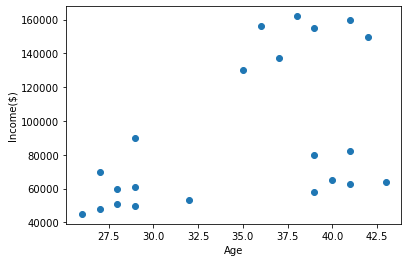

In [3]:
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.scatter(df.Age,df['Income($)'])   # Visualizing to identify cluster

In [4]:
km = KMeans(n_clusters=3) # passing number of cluster parameter, as we can see in plot. It's 3.
km   # Let's see default parameters of this model

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [5]:
y_predicted = km.fit_predict(df[['Age','Income($)']]) # Fit & predict for nsupervised learning
y_predicted  # Here, 0,1,2 are our desired cluster

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2])

In [6]:
df['Cluster']=y_predicted   # Appending cluster column that our model predicted
df.head()

,Name,Age,Income($),Cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1


In [7]:
km.cluster_centers_    # this parameter shows the location of centroids

array([[3.40000000e+01, 8.05000000e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.29090909e+01, 5.61363636e+04]])

In [9]:
df1 = df[df.Cluster==0]  # Creating 3 dataframes for 3 clusters
df2 = df[df.Cluster==1]
df3 = df[df.Cluster==2]

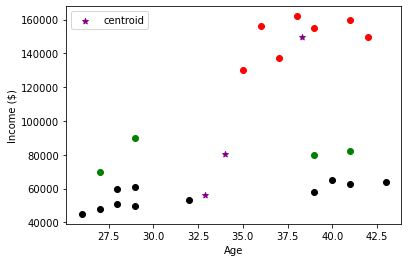

In [11]:
plt.scatter(df1.Age,df1['Income($)'],color='green') # Visualizing clusters
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.xlabel('Age')
plt.ylabel('Income ($)')
# Let's see our centroids
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

**Opps! We got some Error!**
#### _This is actually happened because of our data does not have scaling properly
So, we have to normalize this using **MinMax algorithm**

In [13]:
scaler = MinMaxScaler()

scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']]) # This will convert the scale in between 0 to 1 # scaling income
 
scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']]) # scaling age
df.head()

,Name,Age,Income($),Cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1


In [14]:
# Again training with our proper scaled dataset
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [15]:
df['Cluster']=y_predicted # Updating cluster values with our new trained output
df.head()

,Name,Age,Income($),Cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,2


In [16]:
km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ],
       [0.72268908, 0.8974359 ]])

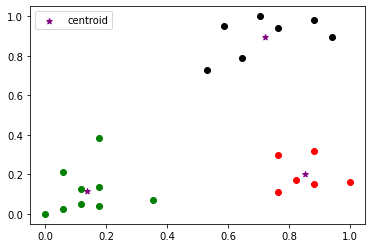

In [18]:
df1 = df[df.Cluster==0]
df2 = df[df.Cluster==1]
df3 = df[df.Cluster==2]

plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

WoW! It's exactly what we wanted.

## ELbow Plot

In [19]:
sse = []                 # Calculating Sum of Square Error
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']]) 
    sse.append(km.inertia_)   # model.interia gives us the value of SSE

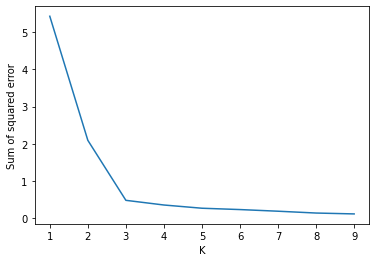

In [20]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

### So, 3 is our optimal numbers of cluster here

## Exercise

Use iris flower dataset from sklearn library and try to form clusters of flowers **using petal width and length** features. 
1. Drop other two features for simplicity.
2. Figure out if any preprocessing such as scaling would help here
3. Draw elbow plot and from that figure out optimal value of k